<a href="https://colab.research.google.com/github/pragyapragati/temp/blob/master/data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
from google.colab import files

In [135]:
uploaded = files.upload()

Saving test.csv to test (5).csv


In [136]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "test.csv" with length 39924 bytes


In [137]:
uploaded

{u'test.csv': 'Company_ID,First Name,Last Name,Address,City,State,Executive Title,Gender,Email_ID,Phone Number,Website,Employee ,Advertising  Expenses,Expenses,Twitter,Linked-In,Facebook,Google Plus\r\nFidelity Square Marketing,Rodney,Moody,900 Wesley Ave,Mobile,AL,Owner,Male,rodney@fidelitysquare.com,2516547456,Fidelitysquare.Com,2,"$5,000 to $10,000",8370,http://twitter.com/fidelitysquare,https://www.linkedin.com/in/rodneymoody/,http://www.facebook.com/fidelitysquaremarketing,http://plus.google.com/+fidelitysquare\r\nFinklea Group,Gavin,Finklea,104 E Bridge St,Wetumpka,AL,Owner,Male,jeremy-spilman@dynamicbenchmarking.com,3342739926,Taplink.Com,5,"Less than $5,000",15200,,https://www.linkedin.com/in/jeremyspilman/,,http://plus.google.com/102140337560141939563/about\r\nFirst Impressions Marketing,Cathy,White,459 James Rd SE,Owens Cross Roads,AL,Owner,Female,catherine@firstimpressionshsv.com,2565397460,Firstimpressionshsv.Com,20,"$100,000 to $250,000",1422,,https://www.linkedin.com/in/c

In [0]:
import io

In [139]:
df = pd.read_csv(io.StringIO(uploaded['test.csv'].decode('utf-8')))
print(df)

                        Company_ID     First Name        Last Name  \
0        Fidelity Square Marketing         Rodney            Moody   
1                    Finklea Group          Gavin          Finklea   
2      First Impressions Marketing          Cathy            White   
3       Flagstone Search Marketing        Carlton         R. Smith   
4             Fusion One Marketing            Rob             Humm   
5               Graphics South Inc         Roland          Langley   
6                 Gray Matters LLC        Lanette            Veres   
7             Harbor Grace Hospice  MaryJo Wilson              NaN   
8      Hi WAAY Information Svc Inc            Jim           Newman   
9       High Seas Design House LLC           Will         Burnette   
10        Hurst Development Co Inc         Martin  Gonzalez-Sayans   
11                     Hy Creative            NaN              NaN   
12               I-Net Service Inc            NaN              NaN   
13                  

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [142]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 18 columns):
Company_ID               219 non-null object
First Name               150 non-null object
Last Name                148 non-null object
Address                  206 non-null object
City                     222 non-null object
State                    222 non-null object
Executive Title          148 non-null object
Gender                   146 non-null object
Email_ID                 40 non-null object
Phone Number             221 non-null object
Website                  123 non-null object
Employee                 222 non-null int64
Advertising  Expenses    212 non-null object
Expenses                 222 non-null int64
Twitter                  72 non-null object
Linked-In                73 non-null object
Facebook                 79 non-null object
Google Plus              49 non-null object
dtypes: int64(2), object(16)
memory usage: 31.3+ KB
None


In [143]:
print('<Contain NaNs?>')
print(df.isnull().any())
missing_ser_percentage = (df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
missing_ser_percentage = missing_ser_percentage[missing_ser_percentage!=0].round(2)
missing_ser_percentage.name = 'missing values %'
print('\n<NaN ratio>')
print(missing_ser_percentage)

<Contain NaNs?>
Company_ID                True
First Name                True
Last Name                 True
Address                   True
City                     False
State                    False
Executive Title           True
Gender                    True
Email_ID                  True
Phone Number              True
Website                   True
Employee                 False
Advertising  Expenses     True
Expenses                 False
Twitter                   True
Linked-In                 True
Facebook                  True
Google Plus               True
dtype: bool

<NaN ratio>
Email_ID                 81.98
Google Plus              77.93
Twitter                  67.57
Linked-In                67.12
Facebook                 64.41
Website                  44.59
Gender                   34.23
Executive Title          33.33
Last Name                33.33
First Name               32.43
Address                   7.21
Advertising  Expenses     4.50
Company_ID                1.3

In [0]:
df.fillna(0,inplace=True)

In [145]:
for col in df.columns:
    print('{} unique element: {}'.format(col,df[col].nunique()))


Company_ID unique element: 216
First Name unique element: 122
Last Name unique element: 140
Address unique element: 207
City unique element: 82
State unique element: 2
Executive Title unique element: 14
Gender unique element: 3
Email_ID unique element: 35
Phone Number unique element: 222
Website unique element: 118
Employee  unique element: 20
Advertising  Expenses unique element: 8
Expenses unique element: 220
Twitter unique element: 68
Linked-In unique element: 74
Facebook unique element: 80
Google Plus unique element: 50


Text(0,0.5,u'Count')

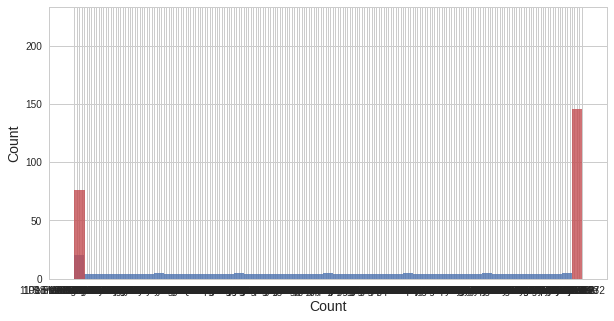

In [146]:
plt.figure(figsize=(10,5))
plt.hist(df['Address'],bins=50, alpha=0.8)
plt.xlabel('Address',fontsize=14)
plt.hist(df['State'],bins=50, alpha=0.8)
plt.xlabel('State',fontsize=14)
plt.hist(df['Gender'],bins=50, alpha=0.8)
plt.xlabel('Gender',fontsize=14)

plt.xlabel('Count',fontsize=14)
plt.ylabel('Count',fontsize=14)

([], <a list of 0 Text xticklabel objects>)

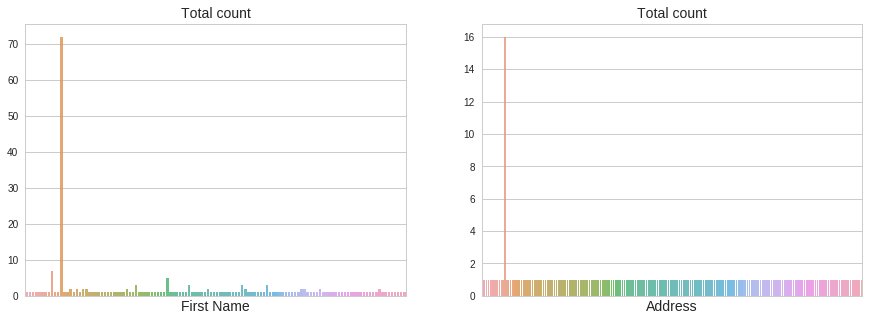

In [147]:
plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot('First Name',data=df,alpha = 0.8)
plt.xlabel('First Name',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])
plt.subplot(122)
sns.countplot('Address',data=df,alpha = 0.8)
plt.xlabel('Address',fontsize=14)
plt.ylabel('')
plt.title('Total count',fontsize=14)
plt.xticks([])

In [148]:
df_AExpenses_by_EID_Gender = df.groupby(['Email_ID','Gender']).agg({'Expenses':np.mean}).reset_index()
df_AExpenses_by_EID_Employee = df.groupby(['Email_ID','Employee']).agg({'Expenses':np.mean}).reset_index()
Employee_order = ['0-3','4-6','7-11','12-15','16-20']


plt.figure(figsize=(20,5))
sns.lmplot('Email_ID','Expenses',data=df_AExecutive_by_EID_Gender,fit_reg=False,hue='Gender',aspect=2.5)
plt.xticks([])
plt.xlabel('Email ID',fontsize=14)
plt.ylabel('')
plt.title('Average purchase by Gender',fontsize=14)
plt.figure(figsize=(20,5))
sns.lmplot('Email_ID','Expenses',data=df_AExecutive_by_EID_Employee,fit_reg=False,hue='Employee',hue_order=Employee_order,aspect=2.5)
plt.xticks([])
plt.xlabel('Email ID',fontsize=14)
plt.ylabel('')
plt.title('Average Expenses by Employee',fontsize=14)



KeyError: ignored